In [1]:
# This script is for OSL Modelling
# Take Dataset 3 NYC for example

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
X_sociodemo_std_test_passed_2 = pd.read_csv("../Data/01 Processed Dataset/Complete_NYC.csv")
X_sociodemo_std_test_passed_1 = X_sociodemo_std_test_passed_2.set_index('GEOID')
y = X_sociodemo_std_test_passed_1.pop('obesity_cr')

In [3]:
X_sociodemo_std_test_passed_1.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density,fafood,fitness,park
GEOID,,,,,,,,,,,,,,,,,,,,,
36081046200,0.128637,0.001426,0.405733,0.000000,0.324729,0.429122,0.443847,0.207074,0.149173,0.097119,...,0.056929,0.086140,0.167808,566100,1964,0.776419,28106.912090,0.637197,0.257692,0.590230
36081045000,0.078431,0.000000,0.579115,0.000000,0.191518,0.447788,0.534483,0.176015,0.133151,0.176471,...,0.077815,0.071591,0.076923,585500,1939,0.326454,12744.813160,0.721141,0.374830,0.778180
36081045400,0.160195,0.008653,0.628800,0.000000,0.101176,0.526514,0.550474,0.151986,0.135123,0.197471,...,0.064898,0.147992,0.089735,168400,1954,0.558124,19521.893370,0.421530,0.228491,0.649373
36081045600,0.028744,0.000000,0.708775,0.000000,0.142209,0.486384,0.604982,0.216339,0.116490,0.087746,...,0.081081,0.170197,0.201201,650900,1939,0.279279,8153.246497,0.096508,0.143136,0.324875
36081044602,0.197928,0.011224,0.427585,0.016836,0.298295,0.462335,0.505800,0.136844,0.189294,0.108353,...,0.089128,0.325225,0.340757,281000,1957,0.869339,27255.666740,0.555596,0.268350,0.474746


In [4]:
len(X_sociodemo_std_test_passed_1), len(y)

(1995, 1995)

In [5]:
len(X_sociodemo_std_test_passed_1.columns), X_sociodemo_std_test_passed_1.columns

(24,
 Index(['% Black', '% Ame Indi and AK Native', '% Asian',
        '% Nati Hawa and Paci Island', '% Hispanic or Latino', '% male',
        '% married', '% age 18-29', '% age 30-39', '% age 40-49', '% age 50-59',
        '% age >=60', '% <highschool', 'median income', '% unemployment',
        '% below poverty line', '% food stamp/SNAP', 'median value units built',
        'median year units built', '% renter-occupied housing units',
        'population density', 'fafood', 'fitness', 'park'],
       dtype='object'))

In [6]:
y.head()

GEOID
36081046200    26.6
36081045000    19.6
36081045400    21.5
36081045600    18.6
36081044602    30.6
Name: obesity_cr, dtype: float64

In [8]:
type(y)

pandas.core.series.Series

In [7]:
# Standardization function
def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

X_sociodemo_std_test_passed_stats = X_sociodemo_std_test_passed_1.describe().transpose()
X_sociodemo_std_test_passed_3 = standarize_data(X_sociodemo_std_test_passed_1,X_sociodemo_std_test_passed_stats)

In [9]:
X_sociodemo_std_test_passed_3.head()

,% Black,% Ame Indi and AK Native,% Asian,% Nati Hawa and Paci Island,% Hispanic or Latino,% male,% married,% age 18-29,% age 30-39,% age 40-49,...,% unemployment,% below poverty line,% food stamp/SNAP,median value units built,median year units built,% renter-occupied housing units,population density,fafood,fitness,park
GEOID,,,,,,,,,,,,,,,,,,,,,
36081046200,-0.398834,-0.257814,1.503630,-0.168852,0.312561,-1.236802,-0.054323,0.426032,-0.114064,-1.044443,...,-0.280556,-0.748263,-0.107441,-0.239460,0.993852,0.685575,0.716045,0.853667,-0.759150,-0.533700
36081045000,-0.566402,-0.391848,2.514798,-0.168852,-0.304033,-0.784182,0.747402,-0.038319,-0.404150,1.488031,...,0.260069,-0.879209,-0.742815,-0.179745,-0.779487,-1.137140,-0.465271,1.362547,-0.245224,0.194071
36081045400,-0.293502,0.421420,2.804557,-0.168852,-0.722202,1.124697,0.888855,-0.397565,-0.368442,2.158240,...,-0.074278,-0.191530,-0.653249,-1.463625,0.284516,-0.198694,0.055874,-0.453735,-0.887263,-0.304689
36081045600,-0.732240,-0.391848,3.270972,-0.168852,-0.532273,0.151657,1.371013,0.564554,-0.705803,-1.343592,...,0.344624,0.008333,0.126008,0.021563,-0.779487,-1.328235,-0.818354,-2.424067,-1.261745,-1.561191
36081044602,-0.167564,0.663019,1.631070,5.686315,0.190205,-0.431459,0.493690,-0.623939,0.612356,-0.685917,...,0.552929,1.403739,1.101639,-1.117030,0.497317,1.061977,0.650586,0.358989,-0.712388,-0.980871


In [10]:
#Sociodemographic predictors
#fit OLS model
X_sociodemo_std_test_passed = X_sociodemo_std_test_passed_3.drop(columns=['fitness','park','fafood'])
X_sociodemo_std_test_passed_constant = sm.add_constant(X_sociodemo_std_test_passed)

model = sm.OLS(y, X_sociodemo_std_test_passed_constant).fit() # this is an OLS object
model.summary2()

C:\Users\ryanz\anaconda3\envs\Obesity\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                    OLS                  Adj. R-squared:         0.860    
Dependent Variable:       obesity_cr           AIC:                    8840.7483
Date:                     2022-04-20 17:51     BIC:                    8963.9131
No. Observations:         1995                 Log-Likelihood:         -4398.4  
Df Model:                 21                   F-statistic:            582.1    
Df Residuals:             1973                 Prob (F-statistic):     0.00     
R-squared:                0.861                Scale:                  4.8676   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                           25.6815   0.0494 519.9143 0.0000 25.5846 25.7783
% Black                          2.6815   0.0876  30.6008 0.0000  2.5096  2.8533
% Ame Indi and AK Native        -0.0793   0.0504  -1.5744 0.1156 -0.1781  0.0195
% Asian                         -1.4705   0.0773 -19.0355 0.0000 -1.6221 -1.3190
% Nati Hawa and Paci Island     -0.0138   0.0496  -0.2785 0.7806 -0.1111  0.0835
% Hispanic or Latino             1.2769   0.0884  14.4372 0.0000  1.1035  1.4504
% male                           0.0683   0.0571   1.1955 0.2320 -0.0438  0.1804
% married                        0.1319   0.1037   1.2710 0.2039 -0.0716  0.3353
% age 18-29                     -0.5454   0.0962  -5.6690 0.0000 -0.7340 -0.3567
% age 30-39                     -0.2663   0.0901  -2.9546 0.0032 -0.4430 -0.0895
% age 40-49                      0.0896   0.0644   1.3899 0.1647 -0.0368  0.2159
% age 50-59                      0.2256   0.0654   3.4471 0.0006  0.0972  0.3539
% age >=60                      -0.9113   0.0872 -10.4505 0.0000 -1.0823 -0.7403
% <highschool                    0.4684   0.1016   4.6099 0.0000  0.2691  0.6677
median income                   -1.1060   0.1034 -10.6928 0.0000 -1.3088 -0.9031
% unemployment                   0.1214   0.0615   1.9757 0.0483  0.0009  0.2420
% below poverty line             0.9513   0.1064   8.9370 0.0000  0.7426  1.1601
% food stamp/SNAP                0.3886   0.1177   3.3008 0.0010  0.1577  0.6194
median value units built        -0.5096   0.0719  -7.0905 0.0000 -0.6506 -0.3687
median year units built          0.3286   0.0525   6.2532 0.0000  0.2255  0.4316
% renter-occupied housing units -1.0358   0.1049  -9.8727 0.0000 -1.2416 -0.8300
population density              -0.5396   0.0615  -8.7795 0.0000 -0.6601 -0.4191
--------------------------------------------------------------------------------
Omnibus:                   64.007            Durbin-Watson:               1.154 
Prob(Omnibus):             0.000             Jarque-Bera (JB):            75.023
Skew:                      0.392             Prob(JB):                    0.000 
Kurtosis:                  3.535             Condition No.:               8     
================================================================================

"""

In [11]:
X_sociodemo_std_test_passed_constant.columns
#y.head()

Index(['const', '% Black', '% Ame Indi and AK Native', '% Asian',
       '% Nati Hawa and Paci Island', '% Hispanic or Latino', '% male',
       '% married', '% age 18-29', '% age 30-39', '% age 40-49', '% age 50-59',
       '% age >=60', '% <highschool', 'median income', '% unemployment',
       '% below poverty line', '% food stamp/SNAP', 'median value units built',
       'median year units built', '% renter-occupied housing units',
       'population density'],
      dtype='object')

In [12]:
# RMSE of the stats model
from statsmodels.tools.eval_measures import rmse
# now generate predictions
ypred = model.predict(X_sociodemo_std_test_passed_constant)
# calc rmse of the model without diet and physical activity info
RMSE = rmse(y, ypred)
RMSE

2.1940744244296173

In [13]:
len(X_sociodemo_std_test_passed_3.columns)

24

In [14]:
# now let's add diet and physical activity measurements
# First VIF test with diet and physical activity measurements
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_sociodemo_std_test_passed_3
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                            feature       VIF
0                           % Black  3.954444
1          % Ame Indi and AK Native  1.041790
2                           % Asian  2.596367
3       % Nati Hawa and Paci Island  1.008837
4              % Hispanic or Latino  3.344289
5                            % male  1.350913
6                         % married  4.462785
7                       % age 18-29  3.810019
8                       % age 30-39  3.366142
9                       % age 40-49  1.757428
10                      % age 50-59  1.815849
11                       % age >=60  3.297298
12                    % <highschool  4.314533
13                    median income  4.924752
14                   % unemployment  1.556987
15             % below poverty line  4.807593
16                % food stamp/SNAP  5.734009
17         median value units built  2.344990
18          median year units built  1.205071
19  % renter-occupied housing units  4.628648
20               population densit

In [15]:
# OLS with adding with diet and physical activity measurements
X_sociodemo_std_test_passed_3_constant = sm.add_constant(X_sociodemo_std_test_passed_3)
model_complete = sm.OLS(y, X_sociodemo_std_test_passed_3_constant).fit() 
summary_complete = model_complete.summary2()
summary_complete

C:\Users\ryanz\anaconda3\envs\Obesity\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                    OLS                  Adj. R-squared:         0.868    
Dependent Variable:       obesity_cr           AIC:                    8723.0261
Date:                     2022-04-20 17:51     BIC:                    8862.9861
No. Observations:         1995                 Log-Likelihood:         -4336.5  
Df Model:                 24                   F-statistic:            546.3    
Df Residuals:             1970                 Prob (F-statistic):     0.00     
R-squared:                0.869                Scale:                  4.5819   
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
const                           25.6815   0.0479 535.8805 0.0000 25.5875 25.7754
% Black                          2.5460   0.0953  26.7085 0.0000  2.3590  2.7329
% Ame Indi and AK Native        -0.0550   0.0489  -1.1232 0.2615 -0.1509  0.0410
% Asian                         -1.5253   0.0772 -19.7478 0.0000 -1.6768 -1.3738
% Nati Hawa and Paci Island     -0.0200   0.0481  -0.4153 0.6780 -0.1144  0.0744
% Hispanic or Latino             1.1223   0.0877  12.8022 0.0000  0.9503  1.2942
% male                           0.0611   0.0557   1.0963 0.2731 -0.0482  0.1703
% married                        0.0632   0.1013   0.6237 0.5329 -0.1354  0.2618
% age 18-29                     -0.5314   0.0936  -5.6797 0.0000 -0.7149 -0.3479
% age 30-39                     -0.1871   0.0879  -2.1279 0.0335 -0.3596 -0.0147
% age 40-49                      0.0983   0.0635   1.5466 0.1221 -0.0263  0.2229
% age 50-59                      0.1825   0.0646   2.8254 0.0048  0.0558  0.3092
% age >=60                      -0.7922   0.0870  -9.1015 0.0000 -0.9629 -0.6215
% <highschool                    0.4386   0.0996   4.4054 0.0000  0.2434  0.6339
median income                   -0.8246   0.1064  -7.7513 0.0000 -1.0332 -0.6159
% unemployment                   0.0858   0.0598   1.4341 0.1517 -0.0315  0.2031
% below poverty line             1.1520   0.1051  10.9606 0.0000  0.9459  1.3581
% food stamp/SNAP                0.4041   0.1148   3.5209 0.0004  0.1790  0.6293
median value units built        -0.3446   0.0734  -4.6938 0.0000 -0.4885 -0.2006
median year units built          0.2663   0.0526   5.0598 0.0000  0.1631  0.3695
% renter-occupied housing units -0.8679   0.1031  -8.4160 0.0000 -1.0702 -0.6657
population density              -0.4485   0.0626  -7.1610 0.0000 -0.5713 -0.3256
fafood                           0.6903   0.0624  11.0668 0.0000  0.5680  0.8126
fitness                         -0.2361   0.0905  -2.6084 0.0092 -0.4136 -0.0586
park                            -0.0436   0.0650  -0.6698 0.5031 -0.1711  0.0840
--------------------------------------------------------------------------------
Omnibus:                   71.437            Durbin-Watson:               1.178 
Prob(Omnibus):             0.000             Jarque-Bera (JB):            91.846
Skew:                      0.387             Prob(JB):                    0.000 
Kurtosis:                  3.712             Condition No.:               8     
================================================================================

"""

In [16]:
# now generate predictions
from statsmodels.tools.eval_measures import rmse
ypred2 = model_complete.predict(X_sociodemo_std_test_passed_3_constant)
# calc rmse of the model with diet and physical activity info
rmse = rmse(y,ypred2)
rmse

2.1270844041620913

In [17]:
# cop is calculated for coefficient
coefficients1 = model_complete.params[1:].round(4)
coefficients11 = pd.DataFrame(coefficients1)
pvalue = model_complete.pvalues[1:]
pvalue1 = pd.DataFrame(pvalue)
cop = pd.merge(coefficients11, pvalue1, right_index = True, left_index = True)
cop[["0_x"]] = cop[["0_x"]].astype(str)

for i in range(len(cop)):
    if cop["0_y"][i] < 0.001:
        cop["0_x"][i] = cop["0_x"][i] + "***"
    if cop["0_y"][i] < 0.01 and cop["0_y"][i] >= 0.001:
        cop["0_x"][i] = cop["0_x"][i] + "**"
    if cop["0_y"][i] < 0.05 and cop["0_y"][i] >= 0.01:
        cop["0_x"][i] = cop["0_x"][i] + "*"

C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/4021656511.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0_x"][i] + "***"
C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/4021656511.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0_x"][i] + "*"
C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/4021656511.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cop["0_x"][i] = cop["0_

In [18]:
cop

,0_x,0_y
% Black,2.546***,2.213668e-134
% Ame Indi and AK Native,-0.055,2.614801e-01
% Asian,-1.5253***,2.397791e-79
% Nati Hawa and Paci Island,-0.02,6.779916e-01
% Hispanic or Latino,1.1223***,4.196506e-36
% male,0.0611,2.730649e-01
% married,0.0632,5.328958e-01
% age 18-29,-0.5314***,1.549612e-08
% age 30-39,-0.1871*,3.346602e-02
% age 40-49,0.0983,1.221226e-01


C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/1274666269.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][21] = 'fast food restaurant vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/1274666269.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][22] = 'fitness and sports center vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/1274666269.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

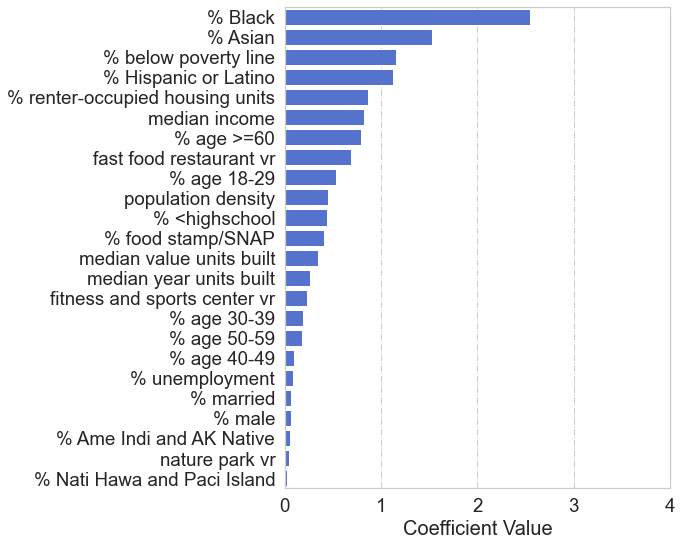

In [19]:
# Significant variables coef figure   

coefficients = model_complete.params[1:]
coef_data = pd.DataFrame()
coef_data["Feature"] = coefficients.index
coef_data["Coefficient"] = coefficients.values
coef_data["Coefficient"] = coef_data["Coefficient"].apply(lambda x : abs(x))
coef_data['Feature'][21] = 'fast food restaurant vr'
coef_data['Feature'][22] = 'fitness and sports center vr'
coef_data['Feature'][23] = 'nature park vr'
coef_data = coef_data.sort_values(by = ['Coefficient'], ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(0,4)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../OLS_coefficients_NYC.png",dpi=300)

C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/3692104296.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][21] = 'fast food restaurant vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/3692104296.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data['Feature'][22] = 'fitness and sports center vr'
C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/3692104296.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

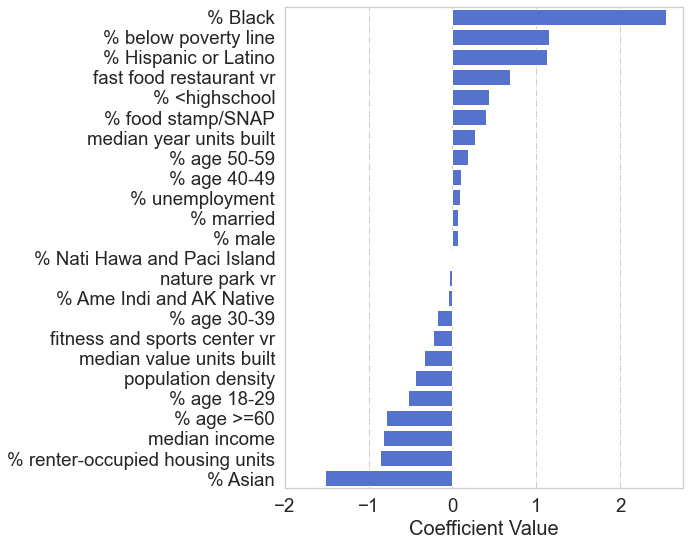

In [20]:
# Significant variables coef figure 2

coefficients = model_complete.params[1:]
coef_data = pd.DataFrame()
coef_data["Feature"] = coefficients.index
coef_data["Coefficient"] = coefficients.values
# coef_data["Coefficient"] = coef_data["Coefficient"].apply(lambda x : abs(x))
coef_data['Feature'][21] = 'fast food restaurant vr'
coef_data['Feature'][22] = 'fitness and sports center vr'
coef_data['Feature'][23] = 'nature park vr'
coef_data = coef_data.sort_values(by = ['Coefficient'], ascending = False)

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.7)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(-2,)
plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/10 OLS Coefficient Figure/OLS_coefficients_NYC.png",dpi=300)

In [21]:
list(coef_data)

['Feature', 'Coefficient']

In [22]:
coef_data_si = coef_data[~((coef_data['Feature'] == '% Ame Indi and AK Native') | (coef_data['Feature'] == '% Nati Hawa and Paci Island')| (coef_data['Feature'] == '% male')| (coef_data['Feature'] == '% married')| (coef_data['Feature'] == '% age 40-49')| (coef_data['Feature'] == '% unemployment')| (coef_data['Feature'] == 'nature park vr'))]
coef_data_si

,Feature,Coefficient
0,% Black,2.545963
15,% below poverty line,1.152012
4,% Hispanic or Latino,1.122269
21,fast food restaurant vr,0.690306
12,% <highschool,0.438643
16,% food stamp/SNAP,0.404148
18,median year units built,0.266258
10,% age 50-59,0.182506
8,% age 30-39,-0.187148
22,fitness and sports center vr,-0.236092


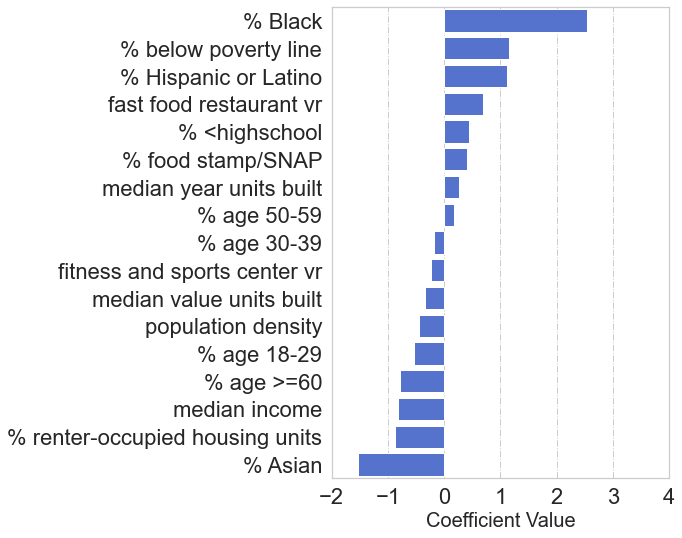

In [45]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)


plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 2)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data_si, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(-2,4)

import matplotlib as mb
ax.xaxis.set_major_locator(mb.ticker.MultipleLocator(1.))

plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/10 OLS Coefficient Figure/OLS_coefficients_NYC1.png",dpi=300)

In [47]:
coef_data_si['Coefficient'] = 0

C:\Users\ryanz\AppData\Local\Temp/ipykernel_24344/3898430214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coef_data_si['Coefficient'] = 0


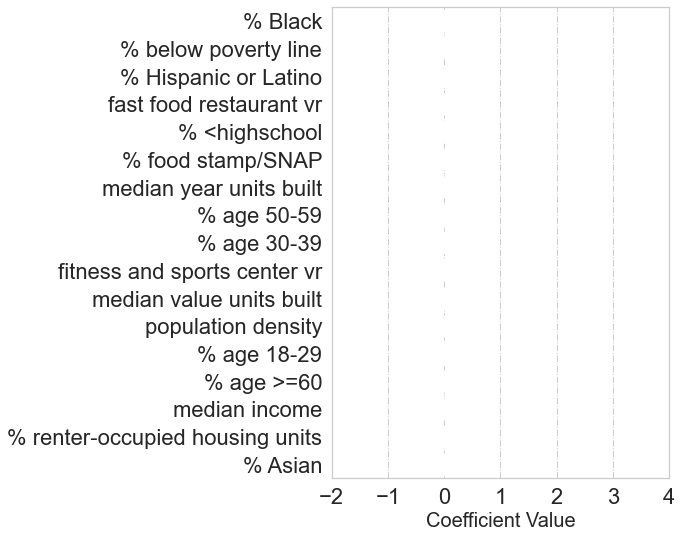

In [48]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)


plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 2)

ax = sns.barplot(y="Feature", x="Coefficient", data=coef_data_si, color = "royalblue")
plt.xlabel('Coefficient Value', fontsize=20)
plt.ylabel('')
plt.xlim(-2,4)

import matplotlib as mb
ax.xaxis.set_major_locator(mb.ticker.MultipleLocator(1.))

plt.grid(axis = 'x', linestyle='-.')
plt.tight_layout()
# plt.savefig("../02 Dataset/10 OLS Coefficient Figure/OLS_coefficients_NYC2.png",dpi=300)

11.0
43.4
12.128120773706444
39.03773437183516


<Figure size 720x576 with 0 Axes>

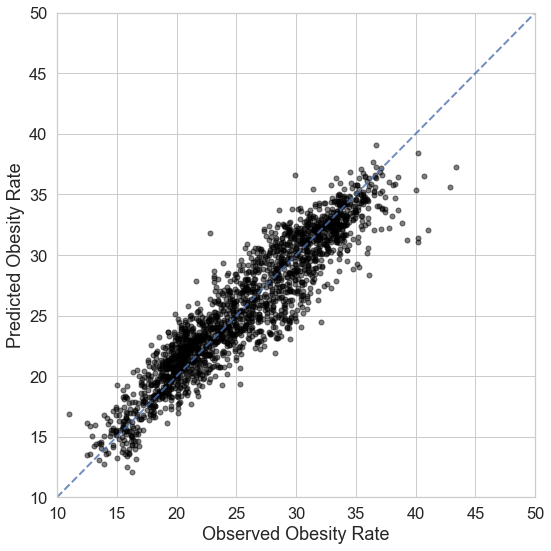

In [24]:
# Scatter and curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed Obesity Rate')
    plt.ylabel('Predicted Obesity Rate')
    plt.title(title)
    
print(np.min(y))
print(np.max(y))
print(np.min(ypred2))
print(np.max(ypred2))

# scatter plot
lims = [10, 50]
prediction_scatter(y, ypred2, lims, "")
plt.tight_layout()
# plt.savefig("../OLS_pred_origin_NYC.png",dpi=300)